# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [6]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76053, 10), (32595, 10), (76053,), (32595,))

0    101322
1      7326
Name: SeriousDlqin2yrs, dtype: int64



Bad key "text.kerning_factor" on line 4 in
/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


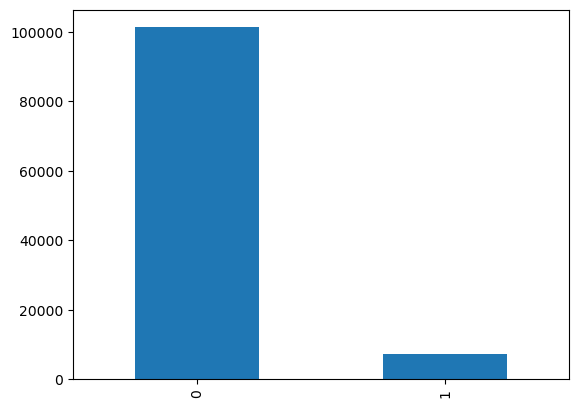

In [7]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
class_distribution = data['SeriousDlqin2yrs'].value_counts()
print(class_distribution)

# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
class_distribution.plot(kind='bar')


#### 2.数据预处理之离散化

In [8]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
data['age'] = data['age'].astype(int)
bin_edges = list(range(0, data['age'].max() + 4, 3))

# 使用 cut 函数进行离散化
data['age_group'] = pd.cut(data['age'], bins=bin_edges, right=False)

#### 3.数据预处理之独热向量编码

In [9]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
one_hot_encoded = pd.get_dummies(data['age_group'], prefix='age_group')
print(data)

        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0                      1                              0.766127   45   
1                      0                              0.957151   40   
2                      0                              0.658180   38   
3                      0                              0.233810   30   
4                      0                              0.907239   49   
...                  ...                                   ...  ...   
112910                 0                              0.385742   50   
112911                 0                              0.040674   74   
112912                 0                              0.299745   44   
112913                 0                              0.000000   30   
112914                 0                              0.850283   64   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                        2.0   0.802982         9120.0   

#### 4.数据预处理之幅度缩放

In [10]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [42]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(C=1000.0, max_iter=100, random_state=0)
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
lr.coef_

Accuracy: 0.93


array([[-0.01428306, -0.36429905,  1.72891212,  0.31210456, -0.11519947,
        -0.09188154,  1.68980927, -0.19642882, -3.24878873,  0.11639217]])

#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
model = LogisticRegression()

# 定义参数网格
param_grid = {'penalty': ['l1', 'l2'], 'C': [1, 10, 100, 500]}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')



In [47]:
# 输出最好的超参数
# 输出最好的模型
grid_search.fit(X_train, y_train)

# 获取最佳参数
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 使用最佳参数的模型在测试集上进行预测
y_pred = grid_search.predict(X_test)

best_model = grid_search.best_estimator_
# 计算准确率
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best Parameters: {'C': 500, 'penalty': 'l2'}
Best Model Accuracy: 0.9332106151250191


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [51]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score,precision_score
# 在测试集上进行预测
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
# 计算各种指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)  # 假设 y_pred_proba 是模型的概率预测值
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 打印结果
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("Confusion Matrix:\n", conf_matrix)
print("F1 Score:", f1)


Accuracy: 0.9332106151250191
Precision: 0.4673913043478261
Recall: 0.019806540764624597
AUC: 0.6796832466259455
Confusion Matrix:
 [[30375    49]
 [ 2128    43]]
F1 Score: 0.03800265134776845


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [52]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标
# 在测试集上进行预测和获取概率值
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# 设定不同的阈值
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# 遍历每个阈值，计算并输出各种指标
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba > threshold).astype(int)

    accuracy = accuracy_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)

    print(f"\nThreshold: {threshold}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("AUC:", auc)
    print("Confusion Matrix:\n", conf_matrix)
    print("F1 Score:", f1)


Threshold: 0.1
Accuracy: 0.7456051541647492
Precision: 0.12443244569885875
Recall: 0.46706586826347307
AUC: 0.6796832466259455
Confusion Matrix:
 [[23289  7135]
 [ 1157  1014]]
F1 Score: 0.19651162790697677

Threshold: 0.2
Accuracy: 0.9153857953673876
Precision: 0.2768060836501901
Recall: 0.16766467065868262
AUC: 0.6796832466259455
Confusion Matrix:
 [[29473   951]
 [ 1807   364]]
F1 Score: 0.20883534136546184

Threshold: 0.3
Accuracy: 0.930756250958736
Precision: 0.3903061224489796
Recall: 0.07047443574389682
AUC: 0.6796832466259455
Confusion Matrix:
 [[30185   239]
 [ 2018   153]]
F1 Score: 0.11939133827545845

Threshold: 0.4
Accuracy: 0.932750421843841
Precision: 0.43558282208588955
Recall: 0.0327038231229848
AUC: 0.6796832466259455
Confusion Matrix:
 [[30332    92]
 [ 2100    71]]
F1 Score: 0.060839760068551844

Threshold: 0.5
Accuracy: 0.9332106151250191
Precision: 0.4673913043478261
Recall: 0.019806540764624597
AUC: 0.6796832466259455
Confusion Matrix:
 [[30375    49]
 [ 2128   

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [53]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 使用逻辑回归模型进行特征选择
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=5)  
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# 训练新的模型
model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train)

# 在测试集上进行预测和评估
y_pred_selected = model_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy with selected features: 0.9339162448228255


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [ ]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
from sklearn.svm import SVC
# K最近邻
from sklearn.neighbors import KNeighborsClassifier

#好像要花的时间有点久
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 创建随机森林模型
rf_model = RandomForestClassifier()

# 使用GridSearchCV进行超参数搜索
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# 输出最佳参数
print("Best Parameters:", grid_search_rf.best_params_)

# 在测试集上进行预测和评估
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy with Random Forest:", accuracy_rf)